# 1 The nonlinear oscillations of the insect flight motor

In [2]:
import sympy as sp
from sympy import I as i
import numpy as np
from sympy.plotting import plot_parametric, plot

## 1.1 Turning the system into a first order differential

In [3]:
x1 = sp.symbols('phi',real=True)
x2 = sp.symbols(r"\dot{\phi}",real=True)
x3 = sp.symbols('F',real=True)
x4 = sp.symbols(r"\dot{F}",real=True)

dx1 = sp.symbols(r'\dot{\phi}',real=True)
dx2 = sp.symbols(r"\ddot{\phi}",real=True)
dx3 = sp.symbols(r'\dot{F}',real=True)
dx4 = sp.symbols(r"\ddot{F}",real=True)

t, gamma, k, T, I, kappa, mu, r,  = sp.symbols("t, Gamma, k, T, I, kappa, mu, r,", real=True)

# State Vector
sx = sp.Matrix([x1,x2,x3,x4])      

# State Vector Derivative
sdx = sp.Matrix([dx1,dx2,dx3,dx4])

# State Space Model
sx_dot = sp.Matrix([x2,
                    (x3/T - gamma*sp.Abs(x2)*x2 - k*x1/T**2)/I,
                    x4,
                    -mu*kappa*r**2*x2-r*(1+kappa)*x4-kappa*r**2*x3]) 

display(sp.Eq(sdx,sx_dot))

Eq(Matrix([
[ \dot{\phi}],
[\ddot{\phi}],
[    \dot{F}],
[   \ddot{F}]]), Matrix([
[                                                      \dot{\phi}],
[         (F/T - Gamma*\dot{\phi}*Abs(\dot{\phi}) - k*phi/T**2)/I],
[                                                         \dot{F}],
[-F*kappa*r**2 - \dot{F}*r*(kappa + 1) - \dot{\phi}*kappa*mu*r**2]]))

## 1.2 Fininding the critical points

In [4]:

spoints = sp.solve(sx_dot,(x1,x2,x3,x4))
spoints 

[(0, 0, 0, 0)]

In [5]:
# Jacobian
sjac = sx_dot.jacobian((x1,x2,x3,x4))
sjac

Matrix([
[          0,                                                              1,           0,              0],
[-k/(I*T**2), (-Gamma*\dot{\phi}*sign(\dot{\phi}) - Gamma*Abs(\dot{\phi}))/I,     1/(I*T),              0],
[          0,                                                              0,           0,              1],
[          0,                                                 -kappa*mu*r**2, -kappa*r**2, -r*(kappa + 1)]])

In [6]:
# Linearizing around the critical point
rep = [(sx[i], spoints[0][i]) for i in range(4)]
lin = sjac.subs(rep)
lin

Matrix([
[          0,              1,           0,              0],
[-k/(I*T**2),              0,     1/(I*T),              0],
[          0,              0,           0,              1],
[          0, -kappa*mu*r**2, -kappa*r**2, -r*(kappa + 1)]])

In [7]:
# Charactoristic Equation 
l,w,  = sp.symbols('lambda, w',real=True)
car = lin.charpoly(l).as_expr(l)
car

lambda**4 + lambda**3*(kappa*r + r) + k*kappa*r**2/(I*T**2) + lambda**2*(I*T**2*kappa*r**2 + k)/(I*T**2) + lambda*(T*kappa*mu*r**2 + k*kappa*r + k*r)/(I*T**2)

In [8]:
# Substitude lambda = i * omega 
car_freq = car.subs(l,i*w)
car_freq

w**4 - I*w**3*(kappa*r + r) + k*kappa*r**2/(I*T**2) - w**2*(I*T**2*kappa*r**2 + k)/(I*T**2) + I*w*(T*kappa*mu*r**2 + k*kappa*r + k*r)/(I*T**2)

In [16]:
# Real Part
RE = sp.Eq(0, sp.re(car_freq))
RE

Eq(0, w**4 + k*kappa*r**2/(I*T**2) - w**2*(I*T**2*kappa*r**2 + k)/(I*T**2))

In [15]:
# Imaginary Part
IM = sp.Eq(0,sp.im(car_freq))
IM

Eq(0, -w**3*(kappa*r + r) + w*(T*kappa*mu*r**2 + k*kappa*r + k*r)/(I*T**2))

In [31]:
# Discard trivial solution and factor out w 
RE = sp.Eq(0,w**2 + k*kappa*r**2/(I*T**2) - (I*T**2*kappa*r**2 + k)/(I*T**2))
IM = sp.Eq(0,-w**2*(kappa*r + r) + (T*kappa*mu*r**2 + k*kappa*r + k*r)/(I*T**2))
display(RE)
display(IM)

Eq(0, w**2 + k*kappa*r**2/(I*T**2) - (I*T**2*kappa*r**2 + k)/(I*T**2))

Eq(0, -w**2*(kappa*r + r) + (T*kappa*mu*r**2 + k*kappa*r + k*r)/(I*T**2))

In [60]:
# Solve Real equation for omega and simplify 
a = sp.Eq(RE.lhs+w**2,sp.factor(-RE.rhs + w**2,r))
a

Eq(w**2, kappa*r**2 - k*kappa*r**2/(I*T**2) + k/(I*T**2))

In [62]:
# Solve Imaginary equation for omega and simplify 
b = sp.Eq(sp.factor(IM.lhs+w**2*(kappa*r+r))/r/(kappa+1),sp.factor(IM.rhs + w**2*(kappa*r+r),r)/r/(kappa+1))
b

Eq(w**2, T*kappa*mu*r/(I*T**2*kappa + I*T**2) + k*kappa/(I*T**2*kappa + I*T**2) + k/(I*T**2*kappa + I*T**2))

In [58]:
# Subtract a from b 
sp.factor(sp.expand(b.rhs-a.rhs),r)*I*T**2*(kappa+1)/r

kappa*(T*mu + r*(-I*T**2*kappa - I*T**2 + k*kappa + k))

In [86]:
SOL1 = sp.solve(b.rhs-a.rhs,mu)[0]
SOL2 = r*(r*I*T**2*(kappa + 1) - k*kappa - k)/T

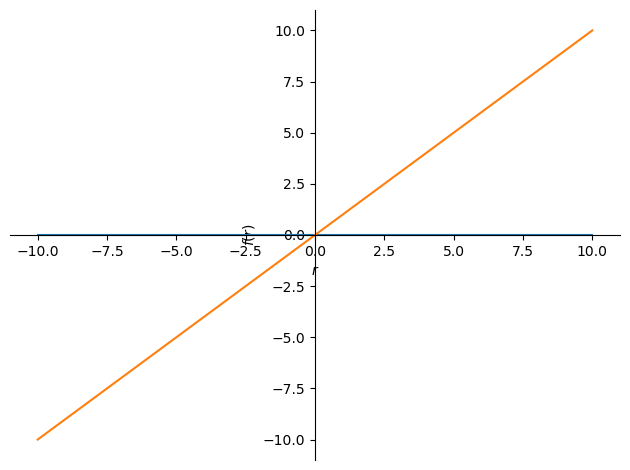

In [89]:
p = plot(SOL1.subs([(gamma,1),(k,1),(I,1),(T,1),(kappa,1)]),r)

In [ ]:
# I cannot determine the corectness of this..... so I will leave it here.